## Training ML models

#### Importing libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

#### Loading dataset(already cleaned and engineered)

In [46]:
df = pd.read_csv('D:/AIjourney/projects/Pride Ads Project/CSV/pride_ads_engineered_1.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head(3)

,brand,name,model,trim,year,mileage,fuel,transmission,body_status,price,age
0,pride,2,پراید,1,1389,355000,1,1,3,345000000,15
1,pride,2,پراید,1,1386,325000,1,1,8,320000000,18
2,pride,7,پراید,10,1404,0,1,1,15,680000000,0


In [7]:
# # Quick check

# print(f"\nMissing values:\n{df.isnull().sum()}")
# print(f"\nData types:\n{df.dtypes}")

---

### Preprocessing

In [48]:
inputs = df[['name','trim','mileage','fuel','transmission','body_status','age']]
outputs = df[['price']]

print('Inputs shape:', inputs.shape)
print('Outputs shape:', outputs.shape)

Inputs shape: (529, 7)
Outputs shape: (529, 1)


In [50]:
x = inputs.values
y = outputs.values
#print(x[0:5])

inputScaler = StandardScaler()
inputScaler.fit(x)
x = inputScaler.transform(x)
#print(x[0:5])

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('X train shape:', x_train.shape)
print('X test shape:', x_test.shape)
print('Y train shape:', y_train.shape)
print('Y test shape:', y_test.shape)

X train shape: (423, 7)
X test shape: (106, 7)
Y train shape: (423, 1)
Y test shape: (106, 1)


---
### Modeling algorithms:
##### 1. Multiple Linear Regression
##### 2. Random Forest
##### 3. XGBoosting
##### 4. Neural Network

### Multiple Linear Regression:

In [56]:
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)

# Predict
pred_LR_train = model_LR.predict(x_train)
pred_LR = model_LR.predict(x_test)

# Evaluate
mae_LR = mean_absolute_error(y_test, pred_LR)
rmse_LR = np.sqrt(mean_squared_error(y_test, pred_LR))
r2_LR = r2_score(y_test, pred_LR)

print(f"MAE:  {mae_LR:,.0f} Toman")
print(f"RMSE: {rmse_LR:,.0f} Toman")
print(f"R²:   {r2_LR*100:,.2f}")

MAE:  48,021,385 Toman
RMSE: 66,597,506 Toman
R²:   81.64


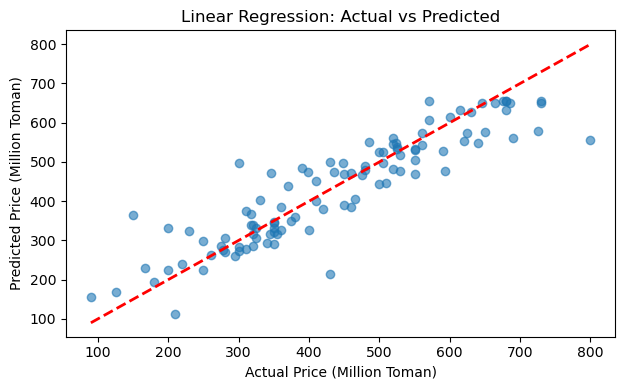

In [58]:
# Visualize
plt.figure(figsize=(12, 4))

#index = np.arange(0, len(x_test))

plt.subplot(1, 2, 1)
plt.scatter(y_test/1e6, pred_LR/1e6, alpha=0.6)
plt.plot([y_test.min()/1e6, y_test.max()/1e6], 
         [y_test.min()/1e6, y_test.max()/1e6], 'r--', linewidth=2)
plt.xlabel('Actual Price (Million Toman)')
plt.ylabel('Predicted Price (Million Toman)')
plt.title('Linear Regression: Actual vs Predicted')

plt.tight_layout()
plt.show()

### Random Forest:

In [60]:
# TRaining
model_RF = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model_RF.fit(x_train, y_train)

# Predict
pred_RF_train = model_RF.predict(x_train)
pred_RF = model_RF.predict(x_test)

# Evaluate
mae_RF = mean_absolute_error(y_test, pred_RF)
rmse_RF = np.sqrt(mean_squared_error(y_test, pred_RF))
r2_RF = r2_score(y_test, pred_RF)

print(f"MAE:  {mae_RF:,.0f} Toman")
print(f"RMSE: {rmse_RF:,.0f} Toman")
print(f"R²:   {r2_RF*100:.2f}")

D:\AIjourney\programs\AnacondaFiles\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE:  44,770,307 Toman
RMSE: 63,843,741 Toman
R²:   83.12


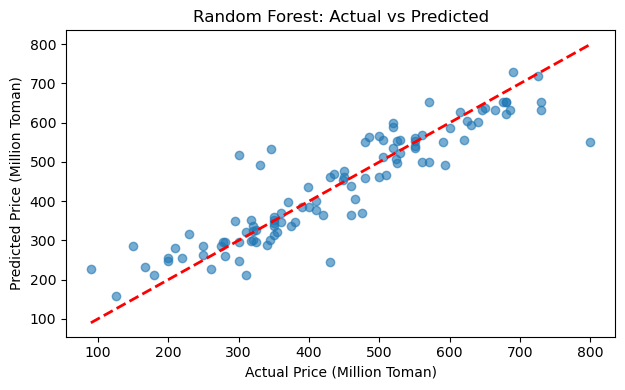

In [62]:
# Visualize
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_test/1e6, pred_RF/1e6, alpha=0.6)
plt.plot([y_test.min()/1e6, y_test.max()/1e6], 
         [y_test.min()/1e6, y_test.max()/1e6], 'r--', linewidth=2)
plt.xlabel('Actual Price (Million Toman)')
plt.ylabel('Predicted Price (Million Toman)')
plt.title('Random Forest: Actual vs Predicted')

plt.tight_layout()
plt.show()

In [64]:
# Feature importance for Random Forest model
feature_importance = pd.DataFrame({
    'feature': inputs.columns,
    'importance': model_RF.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 5 important features (Random Forest):")
for i, row in feature_importance.head(5).iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f}")


Top 5 important features (Random Forest):
  age: 0.814
  mileage: 0.117
  body_status: 0.035
  name: 0.021
  trim: 0.009


### XGBoosting:

In [66]:
# Train
model_XGB = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
model_XGB.fit(x_train, y_train)

# Predict
pred_XGB_train = model_XGB.predict(x_train)
pred_XGB = model_XGB.predict(x_test)

# Evaluate
mae_XGB = mean_absolute_error(y_test, pred_XGB)
rmse_XGB = np.sqrt(mean_squared_error(y_test, pred_XGB))
r2_XGB = r2_score(y_test, pred_XGB)

print(f"MAE:  {mae_XGB:,.0f} Toman")
print(f"RMSE: {rmse_XGB:,.0f} Toman")
print(f"R²:   {r2_XGB*100:.2f}")

MAE:  49,988,673 Toman
RMSE: 69,258,175 Toman
R²:   80.14


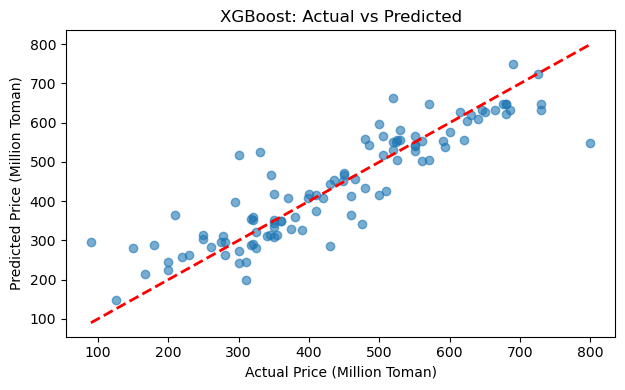

In [68]:
# Visualize
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_test/1e6, pred_XGB/1e6, alpha=0.6)
plt.plot([y_test.min()/1e6, y_test.max()/1e6], 
         [y_test.min()/1e6, y_test.max()/1e6], 'r--', linewidth=2)
plt.xlabel('Actual Price (Million Toman)')
plt.ylabel('Predicted Price (Million Toman)')
plt.title('XGBoost: Actual vs Predicted')

plt.tight_layout()
plt.show()

### Neural Network:

In [70]:
# Splitting for NEURAL NETWORK !!! Inputs and Outputs!!!

x = inputs.values
y = outputs.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

inputScaler_2 = StandardScaler()       # first inputScaler is used for previous models and was fitted on all of x
outputScaler = StandardScaler()

inputScaler_2.fit(x_train)
x_train_scaled = inputScaler_2.transform(x_train)
x_test_scaled = inputScaler_2.transform(x_test)

outputScaler.fit(y_train)
y_train_scaled = outputScaler.transform(y_train)
y_test_scaled = outputScaler.transform(y_test)


In [72]:
# Build model
model_NN = keras.Sequential([
    layers.Input(shape=(x_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

# Compile
model_NN.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),  # Smaller LR
    loss='mse',
    metrics=['mae']
)

# Callbacks
early_stopping = callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True,
    monitor='val_loss'
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.00001
)


model_NN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# Train
print("Training neural network...")
history = model_NN.fit(
    x_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Training neural network...
Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.8215 - mae: 0.7762 - val_loss: 0.3938 - val_mae: 0.5256 - learning_rate: 5.0000e-04
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5487 - mae: 0.5923 - val_loss: 0.2112 - val_mae: 0.3662 - learning_rate: 5.0000e-04
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3343 - mae: 0.4501 - val_loss: 0.1446 - val_mae: 0.2782 - learning_rate: 5.0000e-04
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3026 - mae: 0.4124 - val_loss: 0.1338 - val_mae: 0.2575 - learning_rate: 5.0000e-04
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3064 - mae: 0.4091 - val_loss: 0.1279 - val_mae: 0.2464 - learning_rate: 5.0000e-04
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2680 - mae: 0.3953 - val_loss: 0.1270 - val_mae: 0.2459 - learning_rate: 5.0000e-04
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3578 - mae: 0.4507 - val_loss: 0.1289 - val_mae:

In [76]:
# Predict
pred_NN_train = model_NN.predict(x_train_scaled, verbose=0).flatten()
pred_NN_scaled = model_NN.predict(x_test_scaled, verbose=0).flatten()

pred_NN = outputScaler.inverse_transform(pred_NN_scaled.reshape(-1, 1))

# Evaluate
mae_NN = mean_absolute_error(y_test, pred_NN)
rmse_NN = np.sqrt(mean_squared_error(y_test, pred_NN))
r2_NN = r2_score(y_test, pred_NN)

print(f"MAE:  {mae_NN:,.0f} Toman")
print(f"RMSE: {rmse_NN:,.0f} Toman")
print(f"R²:   {r2_NN*100:.2f}")

MAE:  52,397,159 Toman
RMSE: 69,813,177 Toman
R²:   79.82


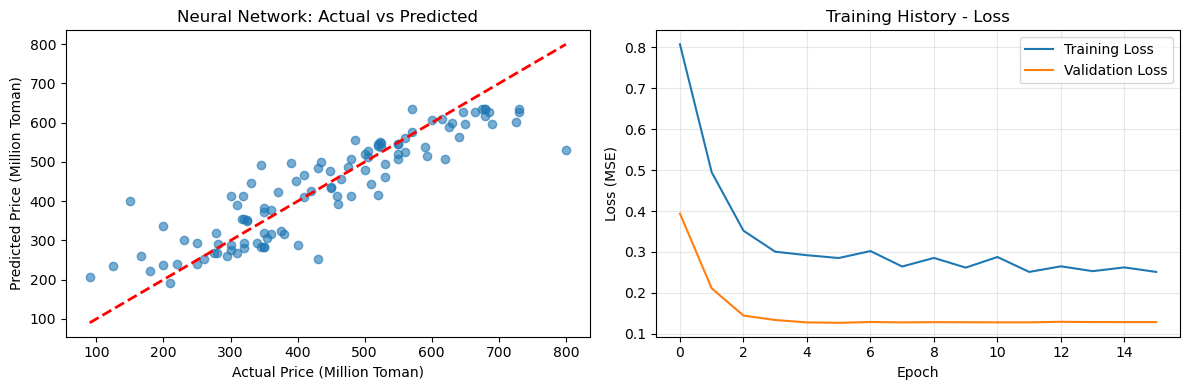

In [78]:
# Visualize
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_test/1e6, pred_NN/1e6, alpha=0.6)
plt.plot([y_test.min()/1e6, y_test.max()/1e6], 
         [y_test.min()/1e6, y_test.max()/1e6], 'r--', linewidth=2)
plt.xlabel('Actual Price (Million Toman)')
plt.ylabel('Predicted Price (Million Toman)')
plt.title('Neural Network: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training History - Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


---
### Performance Comparison:

            Model  MAE (Million Toman)  RMSE (Million Toman)  R² Score  Training R²
    Random Forest            44.770307             63.843741  0.831235     0.954570
Linear Regression            48.021385             66.597506  0.816363     0.819558
          XGBoost            49.988673             69.258175  0.801397     0.974664
   Neural Network            52.397159             69.813177  0.798201     0.804813


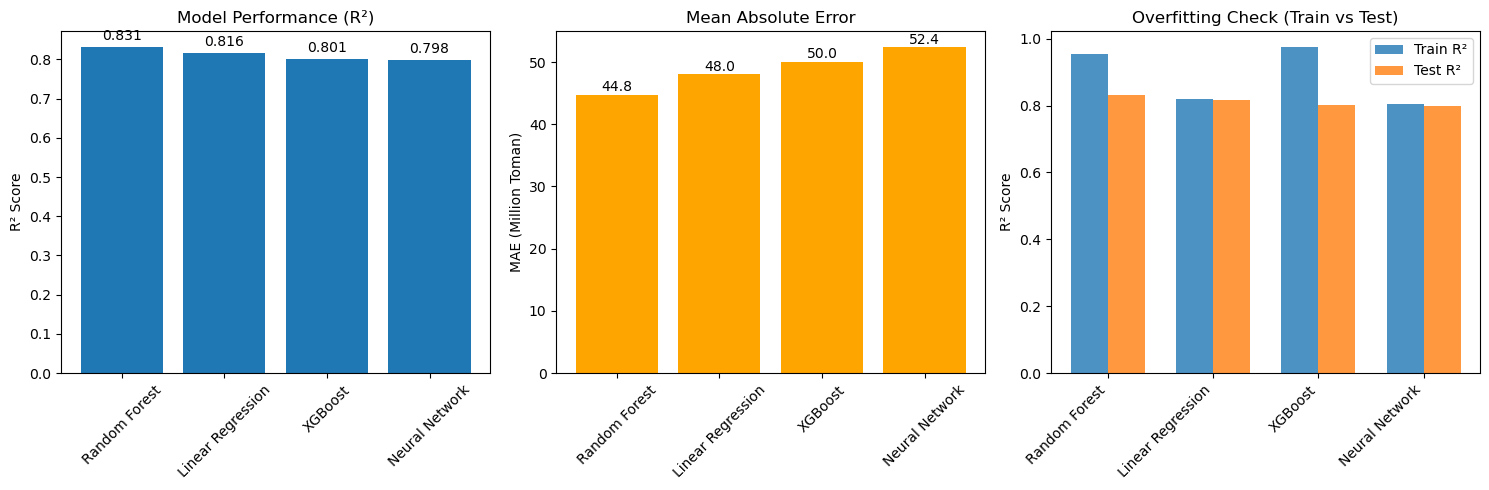


🏆 BEST MODEL: Random Forest
R² Score: 0.8312
MAE: 44.8 Million Toman
Average error: 10.2% of average car price

✅ All models trained and evaluated successfully!
   Best model saved as variable: best_model
   Predictions saved as: pred_LR, pred_RF, pred_XGB, pred_NN


In [84]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Neural Network'],
    'MAE (Million Toman)': [mae_LR/1e6, mae_RF/1e6, mae_XGB/1e6, mae_NN/1e6],
    'RMSE (Million Toman)': [rmse_LR/1e6, rmse_RF/1e6, rmse_XGB/1e6, rmse_NN/1e6],
    'R² Score': [r2_LR, r2_RF, r2_XGB, r2_NN],
    'Training R²': [
        r2_score(y_train, pred_LR_train),
        r2_score(y_train, pred_RF_train),
        r2_score(y_train, pred_XGB_train),
        r2_score(y_train_scaled, pred_NN_train)
    ]
})

# Sort by R² Score
comparison_df = comparison_df.sort_values('R² Score', ascending=False)

print(comparison_df.to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# R² Comparison
models = comparison_df['Model']
r2_scores = comparison_df['R² Score']

bars1 = axes[0].bar(models, r2_scores)
axes[0].set_ylabel('R² Score')
axes[0].set_title('Model Performance (R²)')
axes[0].tick_params(axis='x', rotation=45)
for bar, score in zip(bars1, r2_scores):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{score:.3f}', ha='center', va='bottom')

# MAE Comparison
mae_scores = comparison_df['MAE (Million Toman)']
bars2 = axes[1].bar(models, mae_scores, color='orange')
axes[1].set_ylabel('MAE (Million Toman)')
axes[1].set_title('Mean Absolute Error')
axes[1].tick_params(axis='x', rotation=45)
for bar, mae in zip(bars2, mae_scores):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{mae:.1f}', ha='center', va='bottom')

# Overfitting Check
train_r2 = comparison_df['Training R²']
test_r2 = comparison_df['R² Score']
x = np.arange(len(models))
width = 0.35

axes[2].bar(x - width/2, train_r2, width, label='Train R²', alpha=0.8)
axes[2].bar(x + width/2, test_r2, width, label='Test R²', alpha=0.8)
axes[2].set_xticks(x)
axes[2].set_xticklabels(models, rotation=45, ha='right')
axes[2].set_ylabel('R² Score')
axes[2].set_title('Overfitting Check (Train vs Test)')
axes[2].legend()
axes[2].axhline(y=0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

# Select best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = {
    'Linear Regression': model_LR,
    'Random Forest': model_RF,
    'XGBoost': model_XGB,
    'Neural Network': model_NN
}[best_model_name]

best_r2 = comparison_df.iloc[0]['R² Score']
best_mae = comparison_df.iloc[0]['MAE (Million Toman)']

print("\n" + "=" * 60)
print(f"🏆 BEST MODEL: {best_model_name}")
print("=" * 60)
print(f"R² Score: {best_r2:.4f}")
print(f"MAE: {best_mae:.1f} Million Toman")
print(f"Average error: {best_mae/(y_test.mean()/1e6)*100:.1f}% of average car price")

print("\n✅ All models trained and evaluated successfully!")
print(f"   Best model saved as variable: best_model")
print(f"   Predictions saved as: pred_LR, pred_RF, pred_XGB, pred_NN")

---
### Saving model

In [99]:
import joblib
import json
from datetime import datetime


In [107]:

joblib.dump(inputScaler, 'D:/AIjourney/projects/Pride Ads Project/Models/v1/input_scaler.pkl')
print("Inputs scaler saved as 'input_scaler.pkl'")

joblib.dump(model_RF, 'D:/AIjourney/projects/Pride Ads Project/Models/v1/random_forest_model.pkl')
print("Random Forest model saved as 'random_forest_model.pkl'")

metadata = {
    'model_type': 'RandomForestRegressor',
    'model_name': 'Random Forest',
    'performance': {
        'r2_score': float(r2_RF),
        'mae': float(mae_RF),
        'mae_million_toman': float(mae_RF / 1e6),
        'rmse': float(rmse_RF)
    },
    'training_info': {
        'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'training_samples': x_train.shape[0],
        'test_samples': x_test.shape[0],
        'feature_count': x_train.shape[1]
    },
    'features': {
        'column_names': list(inputs.columns.tolist()),
        'column_order': list(inputs.columns.tolist())  # Important for prediction
    },
    'target': {
        'name': 'price',
        'average_value': float(y_train.mean()),
        'range': [float(y_train.min()), float(y_train.max())]
    },
    'model_parameters': {
        'n_estimators': model_RF.n_estimators,
        'random_state': model_RF.random_state
    }
}

with open('D:/AIjourney/projects/Pride Ads Project/Models/v1/model_metadata.json', 'w', encoding='utf-8') as f:
    json.dump(metadata, f, indent=2, ensure_ascii=False)
print("Metadata saved as 'model_metadata.json'")

# 4. Save feature importance
feature_importance_df = pd.DataFrame({
    'feature': inputs.columns,
    'importance': model_RF.feature_importances_
}).sort_values('importance', ascending=False)

feature_importance_df.to_csv('D:/AIjourney/projects/Pride Ads Project/Models/v1/feature_importance.csv', index=False, encoding='utf-8-sig')
print("Feature importance saved as 'feature_importance.csv'")

Inputs scaler saved as 'input_scaler.pkl'
Random Forest model saved as 'random_forest_model.pkl'
Metadata saved as 'model_metadata.json'
Feature importance saved as 'feature_importance.csv'


In [109]:
# Testing :

scaler_loaded = joblib.load('D:/AIjourney/projects/Pride Ads Project/Models/v1/input_scaler.pkl')
model_loaded = joblib.load('D:/AIjourney/projects/Pride Ads Project/Models/v1/random_forest_model.pkl')

if scaler_loaded and model_loaded:
    print('Scaler and Model successfully loaded.')
else:
    print('Error loading files..!')

Scaler and Model successfully loaded.


In [115]:
#type(model_loaded)